# FLOSS Education Impact

In [1]:
import matplotlib.pyplot as plt
from github import Github
from getpass import getpass
import numpy as np
import pickle

In [2]:
token = getpass()
g = Github(token)

········


In [3]:
mdseps = g.get_organization("fga-eps-mds")
repos = mdseps.get_repos()

In [4]:
issuetime_per_repo = {}
issuecount_per_repo = {}
total_data_per_repo = {}

def is_blacklisted(name):
    blacklisted_semesters = ['2016.1', '2019.2']
    for semester in blacklisted_semesters:
        if semester in name:
            return True
    return False

for repo in repos:
    if not is_blacklisted(repo.name):
        try:
            with open('data/{0}.pickle'.format(repo.name), 'rb') as f:
                data = pickle.load(f)
                total_data_per_repo[repo.name] = data
                
                total_count = 0
                total_time = 0
                
                for issue in total_data_per_repo[repo.name]['issues']:
                    issue = issue['obj']
                    total_count += 1
                    delta = (issue.closed_at - issue.created_at)
                    total_time += delta.seconds/3600

                if total_count != 0:
                    issuetime_per_repo[repo.name] = total_time/total_count
                    issuecount_per_repo[repo.name] = total_count

        except FileNotFoundError:    
            total_data_per_repo[repo.name] = {
                'issues': [],
            }
            issues = repo.get_issues(state='closed')
            total_time = 0
            total_count = 0
            for issue in issues:
                comments = issue.get_comments()
                total_data_per_repo[repo.name]['issues'].append({
                    'obj': issue,
                    'comments':[comment for comment in comments]
                })
                total_count += 1
                delta = (issue.closed_at - issue.created_at)
                total_time += delta.seconds/3600

            if total_count != 0:
                issuetime_per_repo[repo.name] = total_time/total_count
                issuecount_per_repo[repo.name] = total_count

            with open('data/{0}.pickle'.format(repo.name), 'wb') as f:
                pickle.dump(total_data_per_repo[repo.name], f, pickle.HIGHEST_PROTOCOL)

In [5]:
del issuetime_per_repo['A-Disciplina']
issuetime_per_repo['2016.1-Owla'] = issuetime_per_repo['Owla']
del issuetime_per_repo['Owla']
issuetime_per_repo['2017.2-fisCAE'] = issuetime_per_repo['fisCAE-2017-2']
del issuetime_per_repo['fisCAE-2017-2']

del issuecount_per_repo['A-Disciplina']
issuecount_per_repo['2016.1-Owla'] = issuecount_per_repo['Owla']
del issuecount_per_repo['Owla']
issuecount_per_repo['2017.2-fisCAE'] = issuecount_per_repo['fisCAE-2017-2']
del issuecount_per_repo['fisCAE-2017-2']

del total_data_per_repo['A-Disciplina']
total_data_per_repo['2016.1-Owla'] = total_data_per_repo['Owla']
del total_data_per_repo['Owla']
total_data_per_repo['2017.2-fisCAE'] = total_data_per_repo['fisCAE-2017-2']
del total_data_per_repo['fisCAE-2017-2']

In [6]:
semesters = {}
blacklisted_semesters = ['2016.1', '2019.2']
for repo_name in issuetime_per_repo:
    if not repo_name[:6] in blacklisted_semesters:
        if repo_name[:6] in semesters:
            semesters[repo_name[:6]].append(issuetime_per_repo[repo_name])
        else:
            semesters[repo_name[:6]] = [issuetime_per_repo[repo_name]]

avg_closing_time_per_semester = []

for semester in semesters:
    total_delta = 0
    for delta in semesters[semester]:
        total_delta += delta
        
    avg_delta = total_delta/len(semesters[semester])
    avg_closing_time_per_semester.append(
        {
            'id': semester,
            'value': avg_delta
        }
    )
    
avg_closing_time_per_semester = sorted(
    avg_closing_time_per_semester,
    key=lambda x: x['id'])

delta_time_series = [sem['value'] for sem in avg_closing_time_per_semester]
semester_time_series = [sem['id'] for sem in avg_closing_time_per_semester]

Text(0.5, 1.0, 'Average time to close issue by semester')

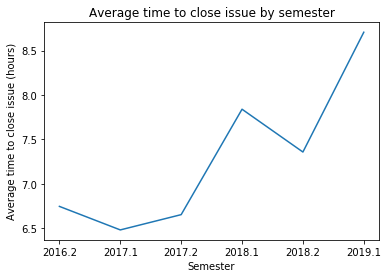

In [7]:
plt.plot(
    semester_time_series,
    delta_time_series
)
plt.xlabel('Semester')
plt.ylabel('Average time to close issue (hours)')
plt.title('Average time to close issue by semester')

In [8]:
semesters = {}
blacklisted_semesters = ['2016.1', '2019.2']
for repo_name in issuetime_per_repo:
    if not repo_name[:6] in blacklisted_semesters:
        if repo_name[:6] in semesters:
            semesters[repo_name[:6]].append({'name': repo_name[7:], 'value':issuetime_per_repo[repo_name]})
        else:
            semesters[repo_name[:6]] = [{'name': repo_name[7:], 'value':issuetime_per_repo[repo_name]}]

avg_closing_time_per_semester = []

for semester in semesters:
    for repo in semesters[semester]:        
        avg_closing_time_per_semester.append(
            {
                'id': semester,
                'value': repo['value'],
                'repo': repo['name']
            }
        )
        
avg_closing_time_per_semester = sorted(
    avg_closing_time_per_semester,
    key=lambda x: x['id']
)

y_axis = [repo['value'] for repo in avg_closing_time_per_semester]
x_axis = [repo['id'] for repo in avg_closing_time_per_semester]
point_labels = [repo['repo'] for repo in avg_closing_time_per_semester]

Text(0.5, 1.0, 'Average time each repo took to close issue')

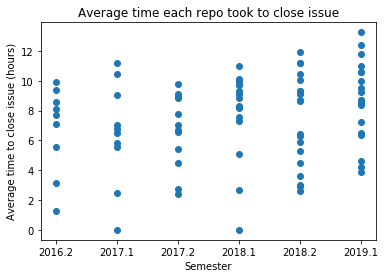

In [9]:
plt.plot(
    x_axis,
    y_axis,
    linestyle='',
    marker='o'
)
plt.xlabel('Semester')
plt.ylabel('Average time to close issue (hours)')
plt.title('Average time each repo took to close issue')

In [10]:
total_data_per_repo

{'2016.2-WikiLegis': {'issues': [{'obj': Issue(title="Merge Us05 and Us12", number=63),
    'comments': []},
   {'obj': Issue(title="Merging ts10_ImproveAMLOC", number=62),
    'comments': []},
   {'obj': Issue(title="Merging stringRefactor", number=61), 'comments': []},
   {'obj': Issue(title="Merging us08_whatsAppShare", number=60),
    'comments': []},
   {'obj': Issue(title="TS04 - Testar Controller", number=59), 'comments': []},
   {'obj': Issue(title="TS #57 e #56 Redesign comment and suggestion view", number=58),
    'comments': []},
   {'obj': Issue(title="TS15 - Design da Sugestão", number=57),
    'comments': []},
   {'obj': Issue(title="TS14 - Design do Cometário", number=56),
    'comments': []},
   {'obj': Issue(title="US01 - Realizar Login", number=54), 'comments': []},
   {'obj': Issue(title="Issue #32: About page", number=53), 'comments': []},
   {'obj': Issue(title="Script Métricas", number=52), 'comments': []},
   {'obj': Issue(title="Planejamento da Sprint 2", number

In [11]:
repo_names = sorted([*total_data_per_repo])
repo_names

['2016.1-Owla',
 '2016.2-CidadeDemocratica',
 '2016.2-CidadeDemocratica-api',
 '2016.2-Jardim-Botanico-Web',
 '2016.2-MissaoNascente',
 '2016.2-Observatorio-de-Residuos-Backend',
 '2016.2-Observatorio-de-Residuos-Frontend',
 '2016.2-SAAP',
 '2016.2-SAS_FGA',
 '2016.2-SME_UnB',
 '2016.2-WikiLegis',
 '2017.1-Cadernos-API',
 '2017.1-Cadernos-APP',
 '2017.1-DEG-API',
 '2017.1-Escola-X',
 '2017.1-Escola-X.app',
 '2017.1-Forum-Coordenadores-DEG',
 '2017.1-OndeE-UnB',
 '2017.1-PlataformaJogosUnB',
 '2017.1-PlataformaJogosUnB-FrontEnd',
 '2017.1-SIGS',
 '2017.1-Trezentos',
 '2017.1-Trezentos-RestAPI',
 '2017.2-AjudaConselheiro-Backend',
 '2017.2-AjudaConselheiro-Frontend',
 '2017.2-Classificacao-de-Risco-Pediatrico',
 '2017.2-DepuTinder',
 '2017.2-DepuTinder-API',
 '2017.2-MerendaMais',
 '2017.2-MerendaMais-Backend',
 '2017.2-QueroCultura',
 '2017.2-Receita-Mais',
 '2017.2-SiGI-Op',
 '2017.2-SiGI-Op_API',
 '2017.2-fisCAE',
 '2018.1-Cardinals',
 '2018.1-Dr-Down',
 '2018.1-Dr-Down-sdcurve',
 '20

In [13]:
closedissues_timetoclose = []

for repo_name in repo_names:
        if repo_name in issuetime_per_repo and repo_name in issuetime_per_repo:
            closedissues_timetoclose.append(
                (issuetime_per_repo[repo_name], issuecount_per_repo[repo_name])
            )

Text(0.5, 1.0, 'Closed issues per average closing time')

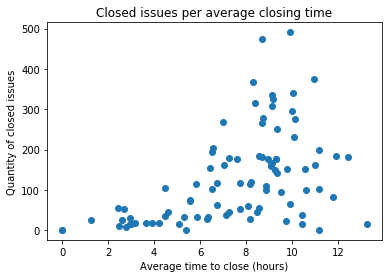

In [19]:
plt.plot(
    [time[0] for time in closedissues_timetoclose],
    [count[1] for count in closedissues_timetoclose],
    linestyle='',
    marker='o'
)
plt.xlabel('Average time to close (hours)')
plt.ylabel('Quantity of closed issues')
plt.title('Closed issues per average closing time')

In [33]:
filtered_data_per_repo = {}

for repo in total_data_per_repo:
    total_issue_body_size = 0
    issues_count = len(total_data_per_repo[repo]['issues'])
    comments_count = 0
    total_comment_size = 0
    for issue in total_data_per_repo[repo]['issues']:
        if issue['obj'].body != None:
            total_issue_body_size+=len(issue['obj'].body)
        for comment in issue['comments']:
            comments_count+=1
            total_comment_size+=len(comment.body)
        
    avg_issue_size = 0
    avg_comment_size = 0
    
    if issues_count > 0:
        avg_issue_size = total_issue_body_size/issues_count
        
    if comments_count > 0:
        avg_comment_size = total_comment_size/comments_count
        
    filtered_data_per_repo[repo] = {
        'issues': issues_count,
        'avg_issue_size': avg_issue_size,
        'comments': comments_count,
        'avg_comment_size': avg_comment_size,
        'total_comment_size': total_comment_size
    }

In [36]:
for repo in filtered_data_per_repo:
    print(repo)
    print("\tIssues: {0}".format(filtered_data_per_repo[repo]['issues']))
    print("\tAverage issue body size: {0}".format(filtered_data_per_repo[repo]['avg_issue_size']))
    print("\tComments: {0}".format(filtered_data_per_repo[repo]['comments']))
    print("\tAverage comment size: {0}".format(filtered_data_per_repo[repo]['avg_comment_size']))
    print("\tTotal comment size: {0}".format(filtered_data_per_repo[repo]['total_comment_size']), end='\n\n')
    

2016.2-WikiLegis
	Issues: 56
	Average issue body size: 289.42857142857144
	Comments: 13
	Average comment size: 85.15384615384616
	Total comment size: 1107

2016.2-MissaoNascente
	Issues: 61
	Average issue body size: 120.52459016393442
	Comments: 0
	Average comment size: 0
	Total comment size: 0

2016.2-Observatorio-de-Residuos-Frontend
	Issues: 72
	Average issue body size: 77.59722222222223
	Comments: 20
	Average comment size: 99.6
	Total comment size: 1992

2016.2-SAS_FGA
	Issues: 142
	Average issue body size: 53.62676056338028
	Comments: 173
	Average comment size: 232.70520231213874
	Total comment size: 40258

2016.2-Jardim-Botanico-Web
	Issues: 66
	Average issue body size: 135.07575757575756
	Comments: 2
	Average comment size: 240.5
	Total comment size: 481

2016.2-SME_UnB
	Issues: 53
	Average issue body size: 59.9811320754717
	Comments: 4
	Average comment size: 109.25
	Total comment size: 437

2016.2-CidadeDemocratica
	Issues: 37
	Average issue body size: 48.270270270270274
	Commen

Text(0.5, 1.0, 'Closed issues per average issue body size')

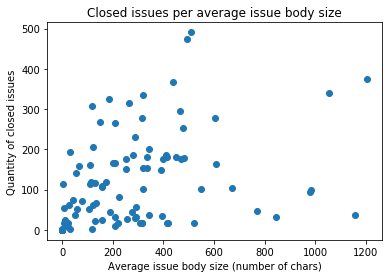

In [40]:
plt.plot(
    [filtered_data_per_repo[repo]['avg_issue_size'] for repo in filtered_data_per_repo],
    [filtered_data_per_repo[repo]['issues'] for repo in filtered_data_per_repo],
    linestyle='',
    marker='o'
)
plt.xlabel('Average issue body size (number of chars)')
plt.ylabel('Quantity of closed issues')
plt.title('Closed issues per average issue body size')